# Soyoung EDA on first received csv file

https://github.com/parksoy/Udacity_nanoDegree_MachineLearning/blob/master/capstone/CapstoneProject_ML4Trading_SoyoungPark.ipynb


In [1]:
%reset

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
df=pd.read_csv('/Users/soyoungpark/Desktop/DAMADAY2020_NASA/ml_data_damaday.csv')
df.head(2)

,USID,0,1,2,3,4,5,6,7,8,...,2000,Param1,Param2,Param3,Param4,Param5,Param6,Param7,Label1,Label2
0,8198000001,0,0,0,0,0,0,0,0,0,...,0,12.6549,5,0.463842,1,3812,83,0.01,CsI,CsI
1,8198000002,0,0,0,0,0,0,0,0,0,...,0,12.2765,5,0.644139,1,2891,99,0.01,CsI,CsI


In [4]:
df.shape

(26685, 2011)

In [5]:
df.dtypes

USID        int64
0           int64
1           int64
2           int64
3           int64
           ...   
Param5      int64
Param6      int64
Param7    float64
Label1     object
Label2     object
Length: 2011, dtype: object

In [6]:
df.index

RangeIndex(start=0, stop=26685, step=1)

## Split X, paramX, y1,y2

In [7]:
df.columns

Index(['USID', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '2000', 'Param1', 'Param2', 'Param3', 'Param4', 'Param5', 'Param6',
       'Param7', 'Label1', 'Label2'],
      dtype='object', length=2011)

In [8]:
df_paramX=df[['Param1','Param2','Param3', 'Param4', 'Param5', 'Param6','Param7']]
df_paramX.head(2)

,Param1,Param2,Param3,Param4,Param5,Param6,Param7
0,12.6549,5,0.463842,1,3812,83,0.01
1,12.2765,5,0.644139,1,2891,99,0.01


In [9]:
y1 = df.Label1
y2 = df.Label2
y1.head(2)

0    CsI
1    CsI
Name: Label1, dtype: object

In [11]:
df_spectrum=df.drop(['Label1','Label2','Param1','Param2','Param3', 'Param4', 'Param5', 'Param6','Param7','USID'], axis=1)
df_spectrum.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Understand y distribution

In [17]:
import plotly.express as px
import plotly.io as pio

fig1 = px.histogram(y1, x="Label1")
pio.show(fig1)

fig2 = px.histogram(y2, x="Label2")
pio.show(fig2)

## Plot each scan(row)

In [96]:
df_spectrum.shape

(26685, 2001)

In [95]:
df_spectrum.iloc[0]

0       0
1       0
2       0
3       0
4       0
       ..
1996    0
1997    0
1998    0
1999    0
2000    0
Name: 0, Length: 2001, dtype: int64

## How each spectrum(row) looks like

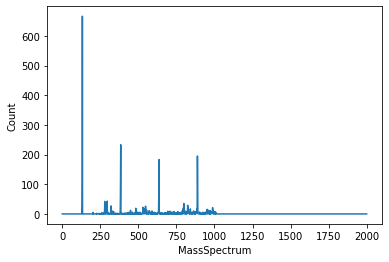

In [104]:

%matplotlib inline 
import matplotlib.pyplot as plt

 
# line plot
series=df_spectrum.iloc[10]
ax=series.plot()
ax.set_ylabel('Count')
ax.set_xlabel('MassSpectrum')

plt.show()

# Get ready for ML/DL training and prediction